In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [2]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 6s 0us/step


### Utility function to generate saliency map

In [3]:
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [4]:
# Load and preprocess image for ResNet-50
def show_image(img_array):
    img_array = img_array[0]
    img_array = img_array - img_array.min()
    img_array = img_array / img_array.max()
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

In [5]:
# Get predicted class and it's probability
def get_prediction(img_array):
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=2)
    predicted_class = decoded_predictions[0][0][1]
    probability_predicted_class = decoded_predictions[0][0][2]
    return predicted_class, probability_predicted_class

In [6]:
# Get probability of the target class (correct class)
def get_probability(img_array, target_class):

    predictions = model.predict(img_array, verbose=0)
    decoded_predictions = decode_predictions(predictions, top=1000)

    target_class_probability = 0.0

    for class_info in decoded_predictions[0]:
        class_label = class_info[1]
        probability = class_info[2]
        if class_label == target_class:
            return probability

    return None

In [7]:
def occlude(img_array, top_left, occlusion_size):

    occluded_image = img_array.copy()
    occluded_image[:, top_left[1]:top_left[1] + occlusion_size,
                   top_left[0]:top_left[0] + occlusion_size, :] = 0
    return occluded_image

In [12]:
def generate_saliency_map(img_array, target_class, occlusion_size=16):

    width, height = img_array.shape[2], img_array.shape[1]
    saliency_map = np.zeros((height, width))
    initial_probability = get_probability(img_array, target_class)

    for i in range(0, width, 5):
        for j in range(0, height, 5):
            occluded_image = occlude(img_array, (i, j), occlusion_size)
            occluded_probability = get_probability(occluded_image, target_class)
            saliency_map[j:j + occlusion_size, i:i + occlusion_size] = occluded_probability

    return saliency_map

## Images and their saliency maps

### African grey

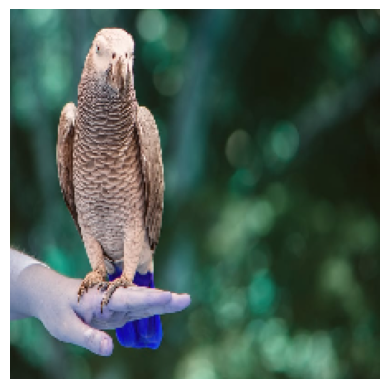

In [26]:
img_path = 'african_grey.jpeg'
img_array = load_image(img_path)
show_image(img_array)

In [27]:
predicted_class, probability_predicted_class = get_prediction(img_array)
print(predicted_class)

print(probability_predicted_class)

1/1 [==============================] - 0s 23ms/step
African_grey
0.99890435


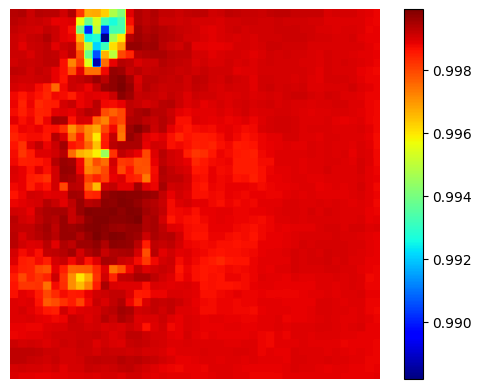

In [28]:
img_path = 'african_grey.jpeg'
img_array = load_image(img_path)

occlusion_size = 16
target_class = 'African_grey'

saliency_map = generate_saliency_map(img_array, target_class, occlusion_size)
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

### Tree frog

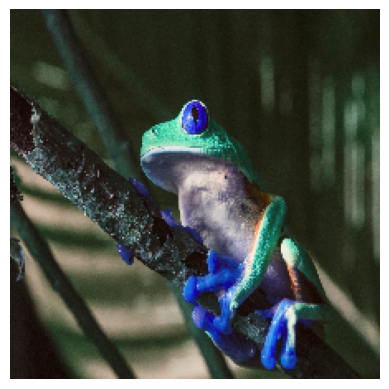

In [29]:
img_path = 'tree_frog.jpeg'
img_array = load_image(img_path)
show_image(img_array)

In [30]:
predicted_class, probability_predicted_class = get_prediction(img_array)
print(predicted_class)

print(probability_predicted_class)

1/1 [==============================] - 0s 37ms/step
tree_frog
0.99211806


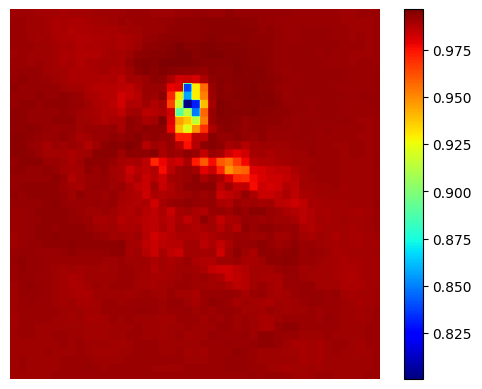

In [31]:
occlusion_size = 16
target_class = 'tree_frog'

saliency_map = generate_saliency_map(img_array, target_class, occlusion_size)
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

### Pomeranian

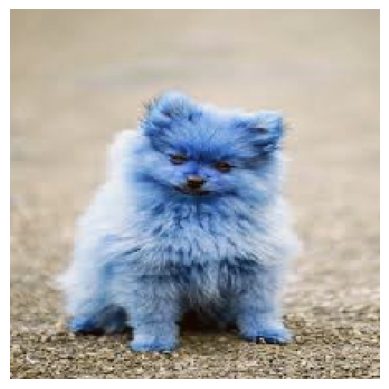

In [35]:
img_path = 'pomeranian.jpeg'
img_array = load_image(img_path)
show_image(img_array)

In [36]:
predicted_class, probability_predicted_class = get_prediction(img_array)
print(predicted_class)

print(probability_predicted_class)

1/1 [==============================] - 0s 26ms/step
Pomeranian
0.83887744


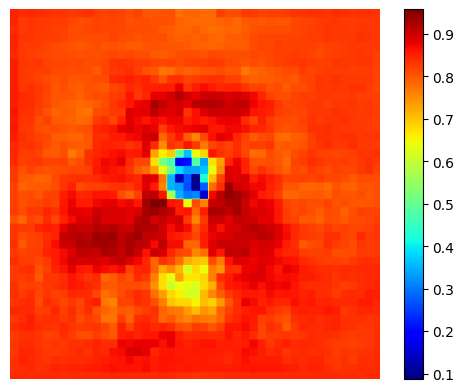

In [37]:
occlusion_size = 16
target_class = 'Pomeranian'

saliency_map = generate_saliency_map(img_array, target_class, occlusion_size)
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

### Hummingbird

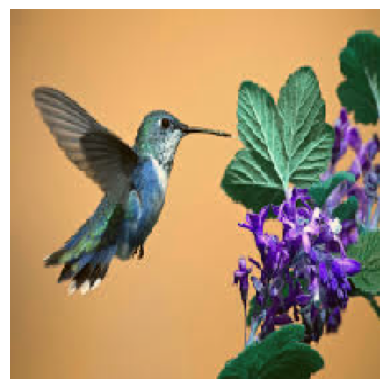

In [38]:
img_path = 'hummingbird.jpeg'
img_array = load_image(img_path)
show_image(img_array)

In [39]:
predicted_class, probability_predicted_class = get_prediction(img_array)
print(predicted_class)

print(probability_predicted_class)

1/1 [==============================] - 0s 24ms/step
hummingbird
0.99973434


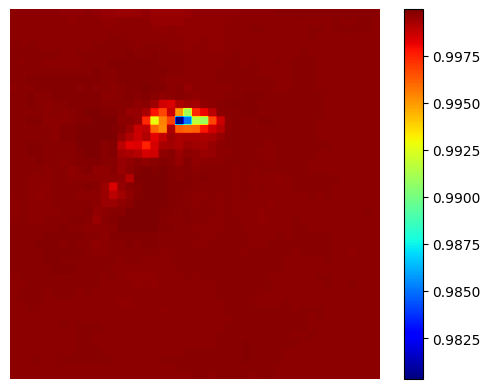

In [40]:
occlusion_size = 16
target_class = 'hummingbird'

saliency_map = generate_saliency_map(img_array, target_class, occlusion_size)
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

### Jacamar

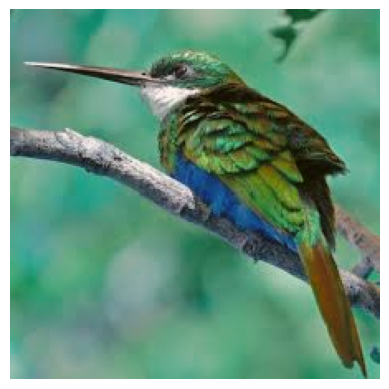

In [41]:
img_path = 'jacamar.jpeg'
img_array = load_image(img_path)
show_image(img_array)

In [42]:
predicted_class, probability_predicted_class = get_prediction(img_array)
print(predicted_class)

print(probability_predicted_class)

1/1 [==============================] - 0s 24ms/step
jacamar
0.996329


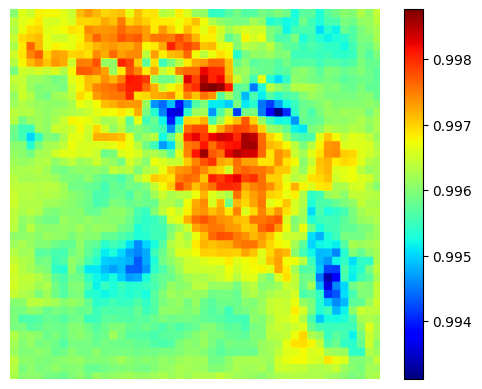

In [43]:
occlusion_size = 16
target_class = 'jacamar'

saliency_map = generate_saliency_map(img_array, target_class, occlusion_size)
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()